In [4]:
%matplotlib inline
from IPython.display import display
from IPython.display import Image
import sys
import math
import numpy as np
import argparse
import os
import shutil
import scipy
import re
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm, colors
from scipy import integrate
import scipy.constants as cst
import h5py
from pythtb import *

In [9]:
def compareBandStructure(w90_input):    
    # the cutoff Fermi energy
    # TODO: Maybe this should be a parameter?
    fermi_ev = 9.6082
    
    # RED - our model where we set up cutoff parameters
    w90_model = w90_input.model(zero_energy=fermi_ev, min_hopping_norm=0.05, max_distance=None)
    (dist, ham) = w90_input.dist_hop()

    # BLACK
    # Returns
    # - k-points reduced coordinates used in the interpolation in Wannier90 code
    # - energies interpolated by Wannier90 in eV.
    (w90_kpt, w90_evals) = w90_input.w90_bands_consistency()

    # corresponds to the red line
    # solve model
    # the reduced model
    int_evals = w90_model.solve_all(w90_kpt)

    # the plotting
    fig, ax = plt.subplots(dpi = 150)

    for i in range(w90_evals.shape[0]):
        ax.plot(list(range(w90_evals.shape[1])), w90_evals[i] - fermi_ev, "k-", zorder = -100)

    # the reduced model
    for i in range(int_evals.shape[0]):
        ax.plot(list(range(int_evals.shape[1])), int_evals[i], "r-", zorder = -50)
    
    ax.set_xlim(0, int_evals.shape[1]-1)
    ax.set_xlabel("K-path from Wannier90")
    ax.set_ylabel("Band energy (eV)")


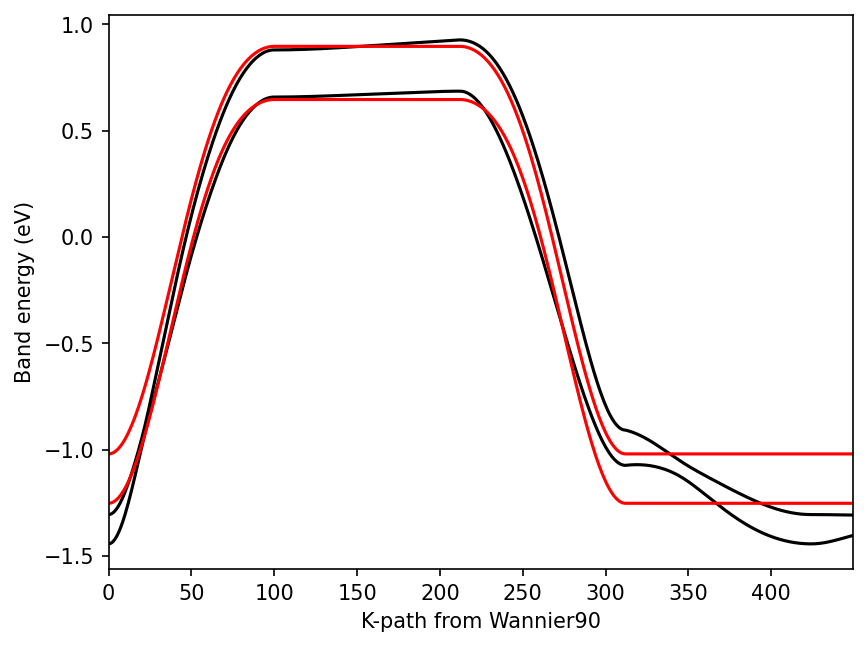

In [10]:
strontium_w90_input = w90('/Users/munenekariuki/Downloads/Simons_Foundation_Internship/Tight Binding Model/Tight Binding Model Examples/tb_analytic', 
                'sccuo2')
compareBandStructure(strontium_w90_input)


In [3]:
w90_model.display()

---------------------------------------
report of tight-binding model
---------------------------------------
k-space dimension           = 3
r-space dimension           = 3
number of spin components   = 1
periodic directions         = [0, 1, 2]
number of orbitals          = 2
number of electronic states = 2
lattice vectors:
 #  0  ===>  [  1.7621 , -7.9961 ,     0.0 ]
 #  1  ===>  [  1.7621 ,  7.9961 ,     0.0 ]
 #  2  ===>  [     0.0 ,     0.0 ,  3.9394 ]
positions of orbitals:
 #  0  ===>  [ -0.0672 ,  1.0672 ,    0.25 ]
 #  1  ===>  [ -0.9361 ,  0.9361 ,    0.75 ]
site energies:
 #  0  ===>    0.0183
 #  1  ===>   -0.1302
hoppings:
<  0 | H |  0 + [  0 ,  0 ,  1 ] >     ===>  -0.5013 +     0.0 i
<  1 | H |  1 + [  0 ,  0 ,  1 ] >     ===>  -0.4524 +     0.0 i
<  0 | H |  0 + [  0 ,  0 ,  2 ] >     ===>  -0.0622 +     0.0 i
<  1 | H |  1 + [  0 ,  0 ,  2 ] >     ===>   -0.064 +     0.0 i
<  0 | H |  1 + [  1 ,  0 , -1 ] >     ===>   0.0564 +     0.0 i
<  0 | H |  1 + [  1 ,  0 ,  0 

/Users/munenekariuki/opt/anaconda3/envs/TRIQS/lib/python3.11/site-packages/pythtb.py:821: RuntimeWarning: invalid value encountered in divide
  orth=orth/np.sqrt(np.dot(orth,orth)) # normalize


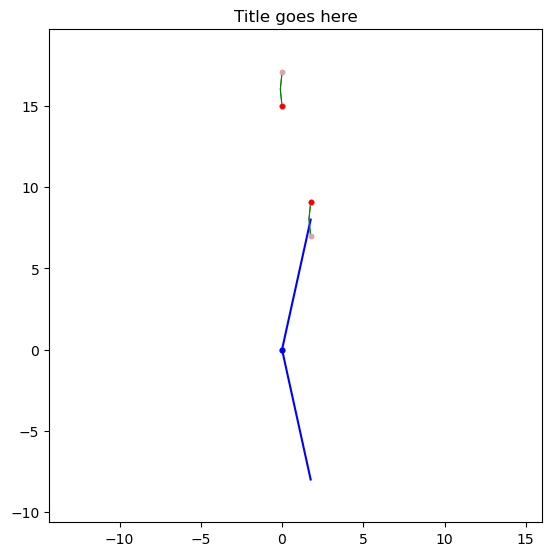

In [4]:
# (fig, ax) = w90_model.visualize(0, 1)
# ax.set_title("Title goes here")
# fig.savefig("model.pdf")

In [5]:
print(w90_model.__dict__)

{'_dim_k': 3, '_dim_r': 3, '_lat': array([[ 1.76207011, -7.99610659,  0.        ],
       [ 1.76207011,  7.99610659,  0.        ],
       [ 0.        ,  0.        ,  3.93940453]]), '_orb': array([[-0.06720294,  1.06720298,  0.24999892],
       [-0.93605725,  0.93605725,  0.75000126]]), '_norb': 2, '_per': [0, 1, 2], '_nspin': 1, '_assume_position_operator_diagonal': False, '_nsta': 2, '_site_energies': array([ 0.018272, -0.130246]), '_site_energies_specified': array([ True,  True]), '_hoppings': [[(-0.501316+0j), 0, 0, array([0, 0, 1])], [(-0.452374+0j), 1, 1, array([0, 0, 1])], [(-0.062208+0j), 0, 0, array([0, 0, 2])], [(-0.064023+0j), 1, 1, array([0, 0, 2])], [(0.056434+0j), 0, 1, array([ 1,  0, -1])], [(0.056436+0j), 0, 1, array([1, 0, 0])]]}


In [6]:
orbs = np.matrix(w90_model._orb)
print(orbs)

[[-0.06720294  1.06720298  0.24999892]
 [-0.93605725  0.93605725  0.75000126]]


In [7]:
lat = np.matrix(w90_model._lat)
print(lat)

[[ 1.76207011 -7.99610659  0.        ]
 [ 1.76207011  7.99610659  0.        ]
 [ 0.          0.          3.93940453]]


In [8]:
print(w90_model._hoppings)

[[(-0.501316+0j), 0, 0, array([0, 0, 1])], [(-0.452374+0j), 1, 1, array([0, 0, 1])], [(-0.062208+0j), 0, 0, array([0, 0, 2])], [(-0.064023+0j), 1, 1, array([0, 0, 2])], [(0.056434+0j), 0, 1, array([ 1,  0, -1])], [(0.056436+0j), 0, 1, array([1, 0, 0])]]


(3, 3)


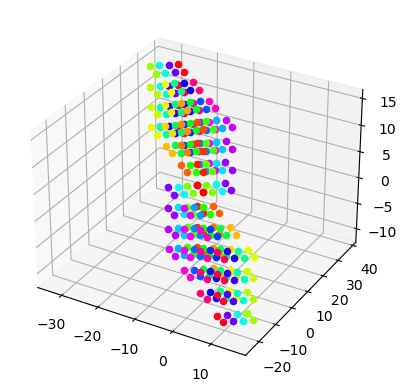

In [9]:
from mycolorpy import colorlist as mcp

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

print(lat.shape)

from itertools import product as itp

layers = 4
len_itp = layers**3
colors = mcp.gen_color(cmap="hsv",n=len_itp)

for l, (l1, l2, l3) in enumerate(itp(range(layers), repeat=3)):
    
    #print(l, l1, l2, l3)
    for orb in orbs:
        o = lat @ (orb.T + np.matrix([l1, l2, l3]).T)
        ax.scatter(o[0], o[1], o[2], c=colors[l])
        o = lat @ (orb.T - np.matrix([l1, l2, l3]).T)
        ax.scatter(o[0], o[1], o[2], c=colors[l])

In [10]:
from triqs.lattice.tight_binding import TBLattice
import sympy as sp

e0, e1, t0z, t1z, t0zz, t1zz, t5, t6 = sp.symbols("e0, e1, t1, t2, t3, t4, t5, t6")

e0 = 0.0183
e1 = -0.1302

t1 = -0.501316
t2 = -0.452374

t3 = -0.062208
t4 = -0.064023

t5 = 0.056434
t6 = 0.056436

hop = {
        (0, 0, 0)   : [[ e0, 0], [0, e1]],
        (0, 0, 1)   : [[ t1, 0], [0, t2]],
        (0, 0, -1)  : [[ t1, 0], [0, t2]],
        (0, 0, 2)   : [[ t3, 0], [0, t4]],
        (0, 0, -2)  : [[ t3, 0], [0, t4]],
        (1, 0, -1)  : [[ 0, t5], [0, 0]],
        (-1, 0, 1)  : [[ 0, 0], [t5, 0]],
        (-1, 0, 0)  : [[ 0, 0], [t6, 0]],
        (1, 0, 0)   : [[ 0, t6], [0, 0]]
      }


# L = TBLattice(units = [(1.7621, -7.9961, 0.) , (1.7621, 7.9961, 0.), (0., 0., 3.9394)], hoppings = hop,                     
#               orbital_positions = [(-0.0672, 1.0672, 0.25), (-0.9361, 0.9361, 0.75)])

I = sp.I
kx, ky, kz = sp.symbols("kx ky kz")
L1_1, L1_2, L1_3, L2_1, L2_2, L2_3, L3_1, L3_2, L3_3 = sp.symbols("L1_1 L1_2 L1_3 L2_1 L2_2 L2_3 L3_1 L3_2 L3_3")
r0, r1 = sp.symbols("r0 r1")
k = sp.Matrix([kx, ky, kz])
Lat = sp.Matrix([[L1_1, L1_2, L1_3],
                 [L2_1, L2_2, L2_3],
                 [L3_1, L3_2, L3_3]])
norb = 2
                                                                                   
#fourier transform the hoppings to find the 8x8 noninteracting H(k) in the Nambu site basis
mx = 1 #max hopping distance in x direction                                        
my = 1 #max hopping distance in y direction                                        
mz = 2 #max hopping distance in z direction                                        
nx = 2*mx+1                                                                        
ny = 2*my+1
nz = 2*mz+1

# print(L.hopping_dict())


# Hrij = np.zeros((nx, ny, nz, norb, norb), dtype = np.complex_)
Hrij = np.zeros((nx, ny, nz, norb, norb), dtype = sp.exp)
# for r in L.hopping_dict():
for r in hop:
    rxind = r[0] + mx
    ryind = r[1] + my
    rzind = r[2] + mz
    # Hrij[rxind, ryind, rzind] = L.hopping_dict()[r]
    Hrij[rxind, ryind, rzind] = hop[r]

Hexp = np.empty_like(Hrij, dtype = sp.exp)
for xi in range(nx):
    for yi in range(ny):
        for zi in range(nz):
            r = np.array([xi-mx, yi-my, zi-mz])
            r = Lat.dot(r)
            eikr = sp.exp(-I*k.dot(r))
            # print(eikr)
            Hexp[xi, yi, zi, :, :] = eikr
Hkrij = Hrij * Hexp
Hk = np.sum(Hkrij, axis = (0,1,2))
for i, j in itp(range(norb), repeat=2):
    Hk[i, j] = Hk[i, j].rewrite(sp.cos).simplify()
print(Hk)

Starting serial run at: 2023-06-23 14:40:48.751522
/Users/munenekariuki/opt/anaconda3/envs/TRIQS/lib/python3.11/site-packages/sympy/matrices/matrices.py:1401: SymPyDeprecationWarning: 

Using the dot method to multiply non-row/column vectors is
deprecated. Use * or @ to perform matrix multiplication.

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-matrix-dot-non-vector
for details.

This has been deprecated since SymPy version 1.2. It
will be removed in a future version of SymPy.

  return self.dot(Matrix(b))


[[-1.002632*cos(L1_3*kx + L2_3*ky + L3_3*kz) - 0.124416*cos(2*L1_3*kx + 2*L2_3*ky + 2*L3_3*kz) + 0.0183
  0.056436*exp(I*(-L1_1*kx - L2_1*ky - L3_1*kz)) + 0.056434*exp(I*(-kx*(L1_1 - L1_3) - ky*(L2_1 - L2_3) - kz*(L3_1 - L3_3)))]
 [0.056436*exp(I*(L1_1*kx + L2_1*ky + L3_1*kz)) + 0.056434*exp(I*(kx*(L1_1 - L1_3) + ky*(L2_1 - L2_3) + kz*(L3_1 - L3_3)))
  -0.904748*cos(L1_3*kx + L2_3*ky + L3_3*kz) - 0.128046*cos(2*L1_3*kx + 2*L2_3*ky + 2*L3_3*kz) - 0.1302]]


In [11]:
# import triqs.lattice.utils
# from triqs.lattice.tight_binding import TBLattice
from triqs.lattice.utils import TB_from_pythTB
tb_triqs = TB_from_pythTB(w90_model)
print(tb_triqs)

# print('-------See the TRIQS tight-binding object below------')

# for key in tb_triqs.hoppings.keys():
#     print(key)
#     print(tb_triqs.hoppings[key].real)

Tight Binding Hamiltonian on Bravais Lattice with dimension 3, units 
[[1.76207,-7.99611,0]
 [1.76207,7.99611,0]
 [0,0,3.9394]], n_orbitals 2
with hoppings [
   [0,0,0] : 
[[(0.018272,0),(-0,0)]
 [(0,0),(-0.130246,0)]]
   [0,0,1] : 
[[(-0.501316,0),(0,0)]
 [(0,0),(-0.452374,0)]]
   [0,0,2] : 
[[(-0.062208,0),(0,0)]
 [(0,0),(-0.064023,0)]]
   [1,0,-1] : 
[[(0,0),(0.056434,0)]
 [(0,0),(0,0)]]
   [1,0,0] : 
[[(0,0),(0.056436,0)]
 [(0,0),(0,0)]] ]


In [12]:
from triqs.lattice.tight_binding import TBLattice
import sympy as sp

e0 = 0.0183
e1 = -0.1302

t1 = -0.501316
t2 = -0.452374

t3 = -0.062208
t4 = -0.064023

t5 = 0.056434
t6 = 0.056436

hop = {
        (0, 0, 0)   : [[ e0, 0], [0, e1]],
        (0, 0, 1)   : [[ t1, 0], [0, t2]],
        (0, 0, -1)  : [[ t1, 0], [0, t2]],
        (0, 0, 2)   : [[ t3, 0], [0, t4]],
        (0, 0, -2)  : [[ t3, 0], [0, t4]],
        (1, 0, -1)  : [[ 0, t5], [0, 0]],
        (-1, 0, 1)  : [[ 0, 0], [t5, 0]],
        (-1, 0, 0)  : [[ 0, 0], [t6, 0]],
        (1, 0, 0)   : [[ 0, t6], [0, 0]]
      }


L = TBLattice(units = [(1.7621, -7.9961, 0.) , (1.7621, 7.9961, 0.), (0., 0., 3.9394)], hoppings = hop,                     
              orbital_positions = [(-0.0672, 1.0672, 0.25), (-0.9361, 0.9361, 0.75)])


I = sp.I
kx, ky, kz = sp.symbols("kx ky kz")
k = sp.Matrix([kx, ky, kz])
norb = 2

#fourier transform the hoppings to find the 8x8 noninteracting H(k) in the Nambu site basis
mx = 1 #max hopping distance in x direction                                        
my = 1 #max hopping distance in y direction                                        
mz = 2 #max hopping distance in y direction                                        
nx = 2*mx+1                                                                        
ny = 2*my+1
nz = 2*mz+1

# print(L.hopping_dict())


Hrij = np.zeros((nx, ny, nz, norb, norb), dtype = np.complex_)
for r in L.hopping_dict():
    rxind = r[0] + mx
    ryind = r[1] + my
    rzind = r[2] + mz
    Hrij[rxind, ryind, rzind] = L.hopping_dict()[r]

Hexp = np.empty_like(Hrij, dtype = sp.exp)
for xi in range(nx):
    for yi in range(ny):
        for zi in range(nz):
            r = np.array([xi-mx, yi-my, zi-mz])
            r = lat.T.dot(r)
            eikr = sp.exp(-I*k.dot(r))
            # print(eikr)
            Hexp[xi, yi, zi, :, :] = eikr
Hkrij = Hrij * Hexp
Hk = np.sum(Hkrij, axis = (0,1,2))
for i, j in itp(range(norb), repeat=2):
    Hk[i, j] = Hk[i, j].rewrite(sp.cos).simplify()
print(Hk)

[[-1.002632*cos(3.939404532*kz) - 0.124416*cos(7.878809064*kz) + 0.0183
  0.056436*exp(I*(-1.762070113*kx + 7.996106593*ky)) + 0.056434*exp(I*(-1.762070113*kx + 7.996106593*ky + 3.939404532*kz))]
 [0.056436*exp(I*(1.762070113*kx - 7.996106593*ky)) + 0.056434*exp(I*(1.762070113*kx - 7.996106593*ky - 3.939404532*kz))
  -0.904748*cos(3.939404532*kz) - 0.128046*cos(7.878809064*kz) - 0.1302]]


In [1]:
Ks = 2*np.pi*np.linalg.inv(lat)
print(lat)
print(Ks)

subs = 0

with open("/mnt/ceph/users/sbeck/materials/srcacuo/sccuo2/wan_conv/sccuo2_band.kpt", 'r') as A:
    lines = A.readlines()[1:]

ks = []
for k in range(len(lines)):
    l = lines[k].split()
    ks.append([float(l[0]), float(l[1]), float(l[2])])
    
# path=np.matrix([[0.0,0.0,0.0],[0.0,0.0,0.5],[0.25,0.25,0.5],[0.25,0.25,0.0],[0.0, 0.0, 0.0],[-0.25,0.25,0.0]])
# ks = []
# nk = 25
# for k in range(len(path)-1):
#     p = path[k+1] - path[k]
#     for i in range(nk):
#         ks.append([path[k, 0]+p[0, 0]/nk*i, path[k, 1]+p[0, 1]/nk*i, path[k, 2]+p[0, 2]/nk*i])
#         # print(ks[-1])
# ks.append([path[-1, 0], path[-1, 1], path[-1, 2]])
# # print(ks[-1])

# Hk2 = [[], [], []]
# for ki, k in enumerate(ks):
#     new_k = Ks @ np.matrix(k).T
#     Hk2_tmp = 0*Hk
#     for i, j in itp(range(norb), repeat=2):
#         Hk2_tmp[i, j] = Hk[i, j].evalf(5, subs={"kx":new_k[0, 0], "ky":new_k[1, 0], "kz":new_k[2, 0]})
#     eigs = np.linalg.eigvals(Hk2_tmp.astype(complex))
#     Hk2[0].append(ki)
#     Hk2[1].append(eigs[0])
#     Hk2[2].append(eigs[1])

a = 3.52414
b = 15.99221
c = 3.93940

e1 = 0.0183
e2 = -0.1302

t11 = -0.501316
t22 = -0.452374

tp11 = -0.062208
tp22 = -0.064023

t12 = 0.056434

Hk2 = [[], [], []]
for ki, k in enumerate(ks):
    new_k = Ks @ np.matrix(k).T
    
    # print(new_k. T)
    
    Hk2_tmp = 0*Hk
    
    Hk2_tmp[0, 0] = 2*t11*np.cos(c*new_k[2]) + 2*tp11*np.cos(2*c*new_k[2]) + e1
    # Hk2_tmp[0, 1] = t12*np.exp(-1j*(a/2*new_k[0]-b/2*new_k[1]))*(1+np.exp( 1j*c*new_k[2]))
    # Hk2_tmp[1, 0] = t12*np.exp( 1j*(a/2*new_k[0]-b/2*new_k[1]))*(1+np.exp(-1j*c*new_k[2]))
    Hk2_tmp[1, 1] = 2*t22*np.cos(c*new_k[2]) + 2*tp22*np.cos(2*c*new_k[2]) + e2
    
    # Hk2_tmp[0, 1] = t12*(1+np.exp( 1j*c*new_k[2]))
    # Hk2_tmp[1, 0] = t12*(1+np.exp(-1j*c*new_k[2]))
    
    Hk2_tmp[0, 1] = t12*(1+np.exp( 1j*c*new_k[2]))
    Hk2_tmp[1, 0] = 2*t12*np.cos(c*new_k[2]/2)
    
    eigs = np.linalg.eigvals(Hk2_tmp.astype(complex))
    Hk2[0].append(ki)
    Hk2[1].append(eigs[0])
    Hk2[2].append(eigs[1])
    
plt.plot(Hk2[0], Hk2[1])
plt.plot(Hk2[0], Hk2[2])



NameError: name 'np' is not defined

In [ ]:
w90_input = w90('/mnt/ceph/users/sbeck/materials/srcacuo/sccuo2/wan_conv/', 'sccuo2')
fermi_ev = 9.6082

w90_model = w90_input.model(zero_energy=fermi_ev, min_hopping_norm=0.05, max_distance=None)
# w90_model = w90_input.model(zero_energy=fermi_ev, min_hopping_norm=0.0, max_distance=3.8586)
# w90_model = w90_input.model(zero_energy=fermi_ev)
(dist, ham) = w90_input.dist_hop()
(w90_kpt, w90_evals) = w90_input.w90_bands_consistency()
int_evals = w90_model.solve_all(w90_kpt)

# solve model
evals = w90_model.solve_all(w90_kpt)

fig, ax = plt.subplots(dpi=150)

for i in range(w90_evals.shape[0]):
    ax.plot(list(range(w90_evals.shape[1])), w90_evals[i]-fermi_ev, "k-", zorder=-100)

for i in range(int_evals.shape[0]):
    ax.plot(list(range(int_evals.shape[1])), int_evals[i], "r-", zorder=-50)

ax.plot(Hk2[0], Hk2[1], color="blue", linestyle=':')
ax.plot(Hk2[0], Hk2[2], color="blue", linestyle=':')
    
ax.set_xlim(0, int_evals.shape[1]-1)
ax.set_xlabel("K-path from Wannier90")
ax.set_ylabel("Band energy (eV)")